<a href="https://colab.research.google.com/github/tntnu/Titanic/blob/main/%5B%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%97%B0%EC%8A%B5%5D_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1_2%EC%B0%A8%EC%A0%9C%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 보통 경진대회에서는 train data와 test data를 나눠서 주기 때문에 train_test_split은 train data를 train data/valid data로 나눌 때 사용됩니다.

In [ ]:
from sklearn.model_selection import train_test_split

# 종속변수(target)의 컬럼을 target으로의 선언이 필요합니다.
target = train['target']

# train data를 8:2로 train data와 valid data로 분리
x_train, x_valid, y_train, y_valid = train_test_split(train, target,
                                                      test_size=0.2,
                                                      random_state=83,
                                                      shuffle=True,
                                                      stratify=target)

In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [ ]:
from google.colab import files
uploaded_file = files.upload()

Saving Titanic_test.csv to Titanic_test.csv


# ***1. Exploratory data analysis***

## **1.1 데이터 탐색**

In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# train, test 데이터 shape 확인
print("train 데이터 shape : ", train.shape)
print("test 데이터 shape : ", test.shape)

# raw data 독립변수 11개

train 데이터 shape :  (891, 12)
test 데이터 shape :  (418, 11)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
# train data 결측치 확인
train.isnull().sum()

# Cabin 결측치의 개수가 너무 많으므로 변수 제거

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# test data 결측치 확인
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


## **1.2 데이터 시각화**

### **Bar chart for categorical features**
* Pclass
* Sex
* SibSp
* Parch
* Embarked
* Cabin

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
def bar_chart(feature) :
  survived = train[train['Survived'] == 1][feature].value_counts()
  dead = train[train['Survived'] == 0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived', 'Dead']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5)) # stacked=True → 누적 막대 그래프

#### **1.2.1 Sex**

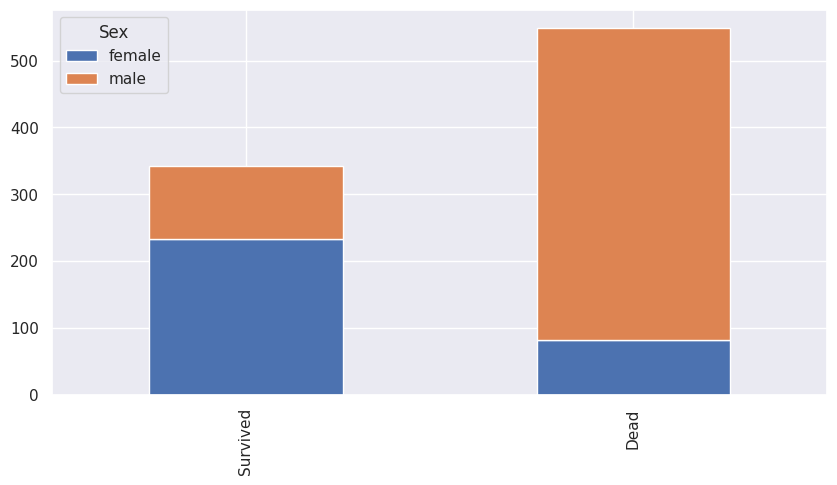

In [ ]:
bar_chart('Sex')

* female 생존률 : 0.742038
* male 생존률 :	0.188908


In [ ]:
# 1. 성별 생존률 계산
female_survival_rate = train.groupby('Sex')['Survived'].mean()
female_survival_rate

,Survived
Sex,
female,0.742038
male,0.188908


#### 1.2.2 Pclass

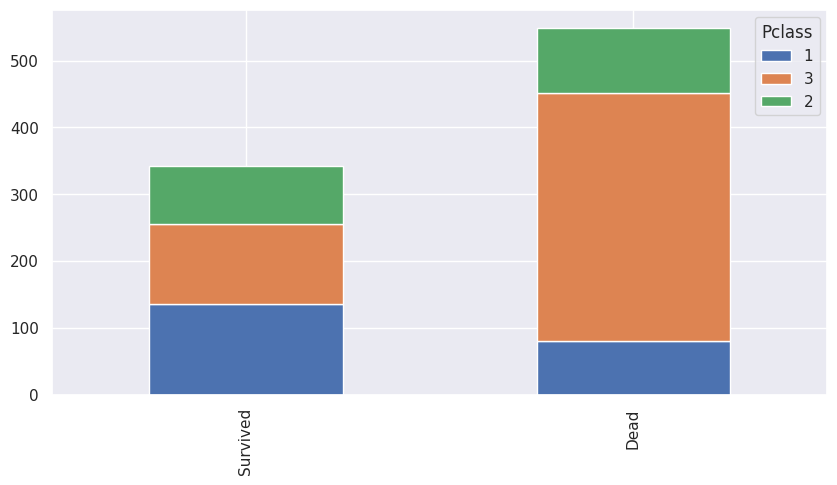

In [ ]:
bar_chart('Pclass')
# Pclass = 3인 경우 사망자가 많음

In [ ]:
pclass_survival_rate = train.groupby('Pclass')['Survived'].mean()
pclass_survival_rate
# Pclass = 1인 경우 생존률이 가장 높음
# Pclass = 3인 경우 생존률이 가장 낮음

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### 1.2.3 SibSp

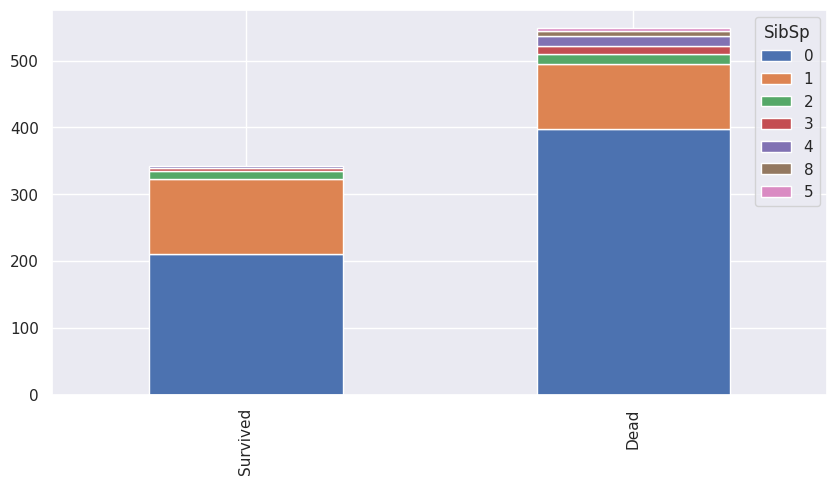

In [ ]:
bar_chart('SibSp')

In [ ]:
SipSp_survival_rate = train.groupby('SibSp')['Survived'].mean()
SipSp_survival_rate
# SipSp = 1인 경우 생존률이 가장 높음
# SipSp = 5, 8인 경우 생존률이 가장 낮음(5, 8 -> 4 -> 3)

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


#### 1.2.4 Parch

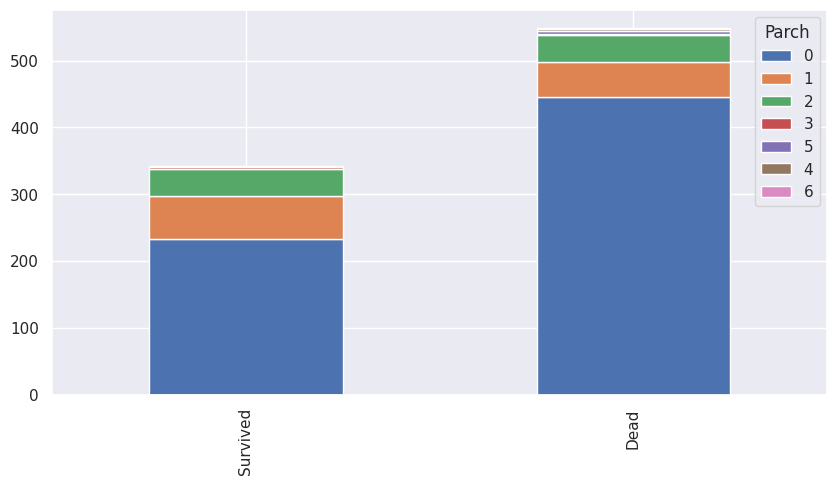

In [ ]:
bar_chart('Parch')
# Parch = 0인 경우 사망자가 많음

In [ ]:
Parch_survival_rate = train.groupby('Parch')['Survived'].mean()
Parch_survival_rate
# Parch = 3인 경우 생존률이 가장 높음
# Parch = 4, 6인 경우 생존률이 가장 낮음 (4, 6 -> 5 -> 0)

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


#### 1.2.5 Embarked

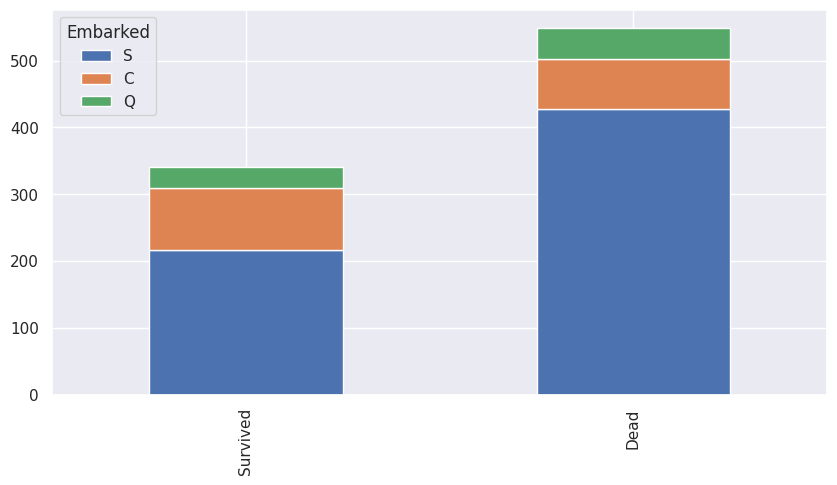

In [ ]:
bar_chart('Embarked')
# Embarked = S인 경우 사망자가 많음

In [ ]:
embarked_survivla_rate = train.groupby('Embarked')['Survived'].mean()
embarked_survivla_rate

# Embarked = C인 경우 생존률 가장 높음
# Embarked = S인 경우 생존률 가장 낮음

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


# ***2. Feature engineering***

## ***2.1 불필요한 변수 제거***

* Cabin 결측치 많아서 제거
* PassengerId, Name, Ticket 불필요한 변수라 판단하여 제거

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis =1)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


## ***2.2 결측치 처리***

In [ ]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


### 2.2.1 Age 결측치 제거(train, test)

### 2.2.2 Embarked 결측치 제거(train)

### 2.2.3 Fare 결측치 제거(test)

## ***2.3 범주형 변수로 변경***

### 2.3.1 Sex(train, test)

* male = 0, female = 1

In [ ]:
train['Sex'] = train['Sex'].replace({'female' : 1, 'male' : 0})
test['Sex'] = test['Sex'].replace({'female' : 1, 'male' :0})

<ipython-input-26-69968b2cadfa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'female' : 1, 'male' : 0})
<ipython-input-26-69968b2cadfa>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace({'female' : 1, 'male' :0})


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


### 2.3.2 Embarked(train, test)

* Q = 0, C = 1, S = 2

In [ ]:
train['Embarked'] = train['Embarked'].replace({'Q' : 0, 'C' : 1, 'S' = 2})

# ***2. EDA***

* 종속변수가 Survived이므로 각 독립변수 별로 종속변수 비율을 확인해봐야 함

### 1.종속 변수

In [ ]:
train['Survived'].value_counts()

# train['변수명'].value_counts() 해당 변수 값의 개수를 count

,count
Survived,
0,549
1,342


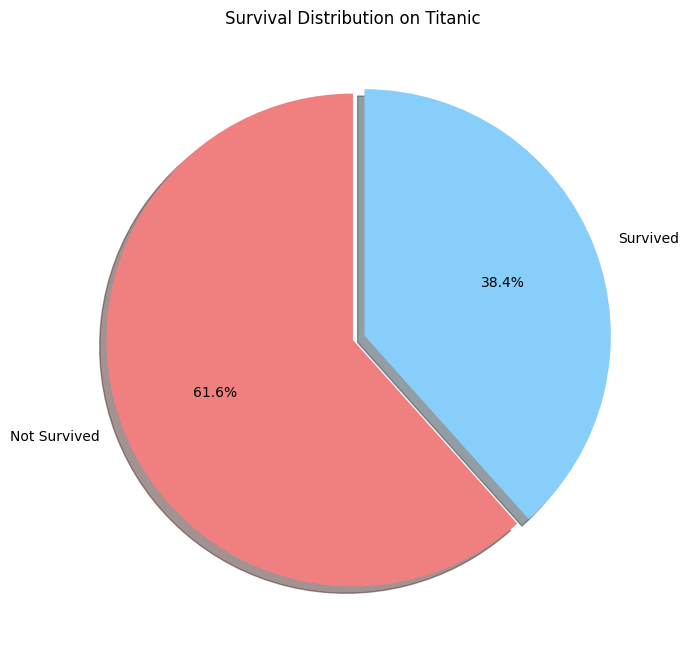

In [ ]:
# 생존 여부 데이터
survival_counts = train['Survived'].value_counts()

# 파이차트 그리기
labels = ['Not Survived', 'Survived']  # 각 클래스의 라벨
colors = ['lightcoral', 'lightskyblue']  # 색상 지정
explode = [0, 0.05]  # 강조할 부분 (생존자를 약간 분리)

plt.figure(figsize=(8, 8))  # 그림 크기 설정
plt.pie(survival_counts,
        labels=labels,
        autopct='%1.1f%%', # 소수점 한 자리까지 백분율로 표시, 백분율 기호 %를 출력하려면 이스케이프 처리로 %%를 사용
        startangle=90, # 파이차트 시작 각도를 설정
        colors=colors,
        explode=explode,
        shadow=True) # 차트 그림자 여부
plt.title('Survival Distribution on Titanic')  # 제목 설정
plt.show()

# 사망 비율 61.6%, 생존 비율 38.4% 생존자보다 사망자가 많음을 알 수 있음

#### 범주형에 대한 막대차트


In [ ]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

### 2. Sex

In [ ]:
sex_counts = train['Sex'].value_counts()
sex_counts

,count
Sex,
male,577
female,314


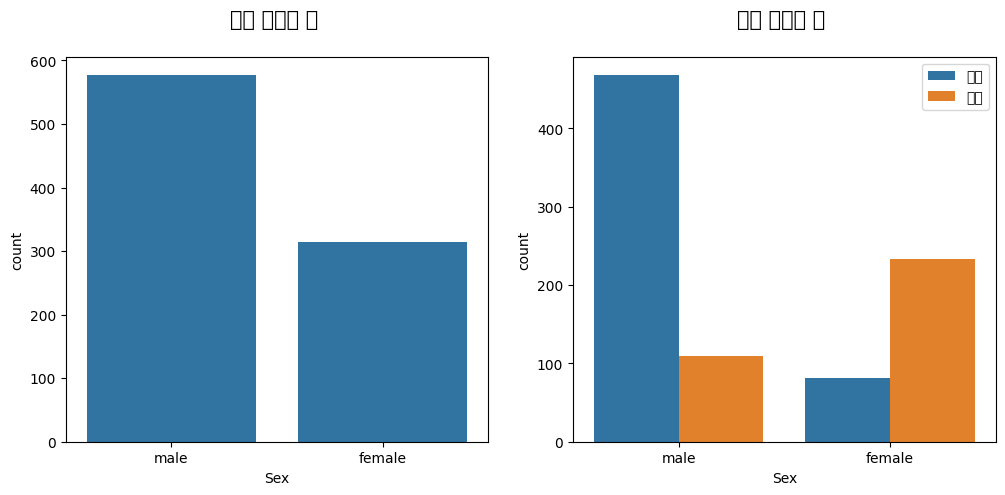

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# fig: 전체 캔버스를 나타내는 객체.
# axes: 각각의 서브플롯을 나타내는 객체로, 배열 형태입니다. (axes[0], axes[1] 두 개의 서브플롯)

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1]) # 성별에 따른 생존자 수와 자망자 수를 그래프로 생성
axes[1].legend(labels = ['사망', '생존'])

# 성별 탑승자 수는 남성이 여성보다 많음을 알 수 있음
# 남지의 경우 생존자보다 사망자가 훨씬 많은 것을 알 수 있음 -> 생존자 < 사망자
# 여성의 경우 사망자보다 생존자가 많은 것을 알 수 있음 -> 사망자 < 생존자

,Survived
Sex,
female,0.742038
male,0.188908


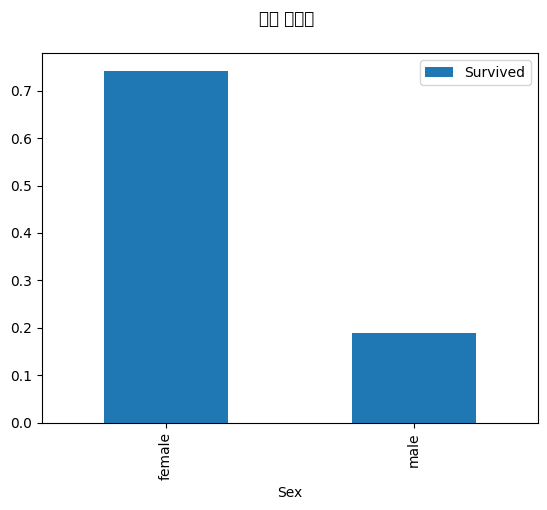

In [ ]:
# 성별 생존률
sur = train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
sur.set_title("성별 생존률 \n")
train[['Sex', 'Survived']].groupby('Sex').mean() # Survived 값은 0(사망) 또는 1(생존)만 가지므로, 평균은 생존 비율과 동일

### 3. Pclass

In [ ]:
Pclass_counts = train['Pclass'].value_counts()
Pclass_counts

# Pclass = 1인 경우 Fare 값이 큼 -> 1등급, 2등급, 3등급
# 2등급 < 1등급 < 3등급

,count
Pclass,
3,491
1,216
2,184


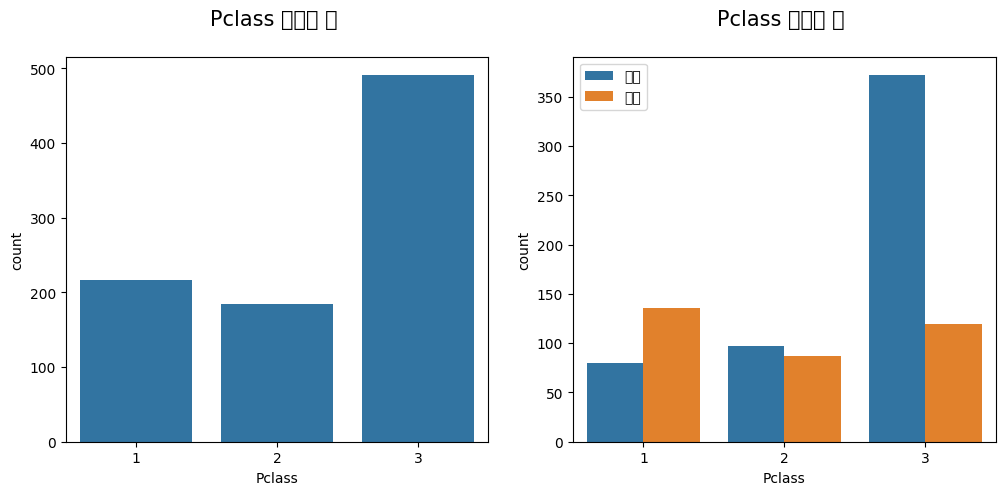

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].set_title("Pclass 탑승자 수 \n", size = 15)
sns.countplot(x='Pclass', data = train, ax = axes[0])

axes[1].set_title("Pclass 생존자 수 \n", size = 15)
sns.countplot(x='Pclass', hue = 'Survived', data = train, ax = axes[1])
axes[1].legend(labels=['사망', '생존'])

# Pclass = 1인경우(1등급) : 사망자 < 생존자
# Pclass = 2인경우(2등급) : 사망자 < 생존자 (미세하게 생존자가 더 많음)
# Pclass = 3인경우(3등급) : 생존자 < 사망자 (월등하게 사망자가 더 많음)


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


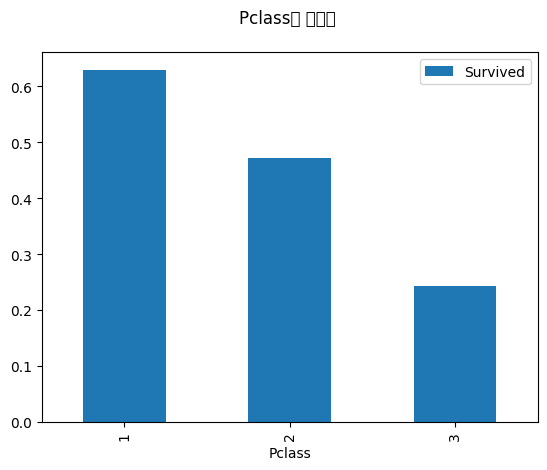

In [ ]:
# Pclass별 생존률
pclass_sur = train[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()
pclass_sur.set_title("Pclass별 생존율 \n")
train[['Pclass', 'Survived']].groupby('Pclass').mean()

### 4. Age

In [ ]:
train['Age'].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Figure size 800x500 with 0 Axes>

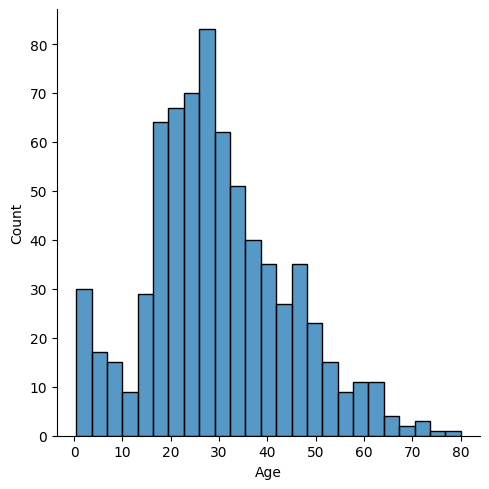

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(train['Age'], bins = 25)

# 20~40세 분포도 높음

<Figure size 800x500 with 0 Axes>

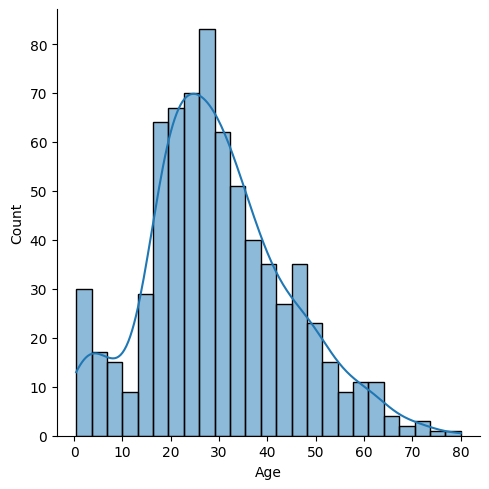

In [ ]:
plt.figure(figsize=(8,5))
sns.displot(train['Age'], bins = 25, kde = True) # bins : 막대 그래프의 개수
# displot 히스토그램
# 커널 밀도 추정(kde)

<Axes: xlabel='Age', ylabel='Density'>

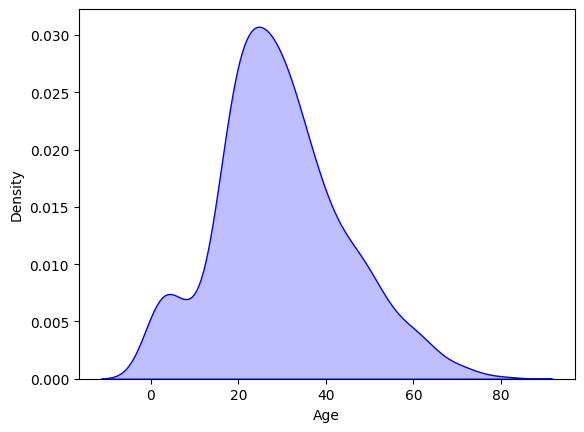

In [ ]:
sns.kdeplot(train['Age'], shade=True, color="blue")

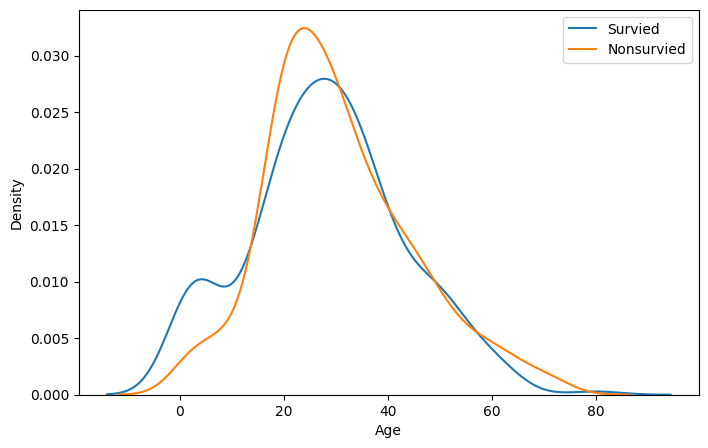

In [ ]:
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False, label='Survied') # 히스토그램은 그려지지 않고 kde 곡선만 표시됨
sns.distplot(dead['Age'], bins=25, hist=False, label='Nonsurvied')
plt.legend()

# kde 데이터의 확률 밀도를 나타내며 이는 데이터가 특정 범위에 얼마나 밀집되어 있는지를 보여줌
# kde : 총 면적은 항상 1로 정규화 됨
# 나이가 어린 경우 생존률이 사망률보다 높고 20~30세의 경우에는 사망률이 생존률보다 높음을 알 수 있음

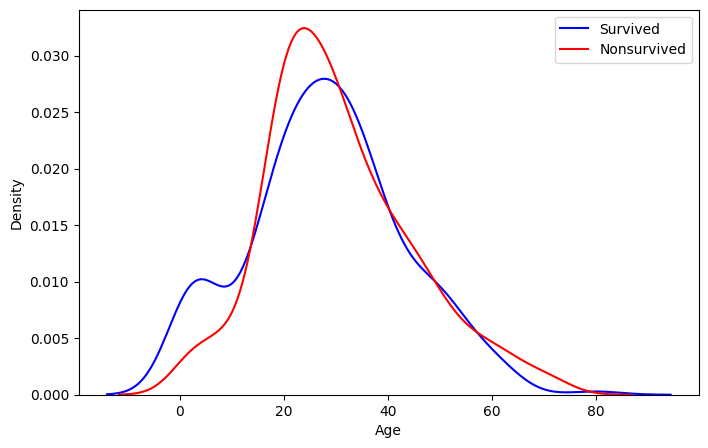

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(sur['Age'], label='Survived', color='blue')  # 생존자
sns.kdeplot(dead['Age'], label='Nonsurvived', color='red')  # 비생존자
plt.legend()
plt.show()

# Seaborn 0.11.0 이후부터는 sns.distplot()은 더 이상 권장되지 않습니다(deprecated). 대신, sns.kdeplot()을 사용

### 5. SibSp, Parch

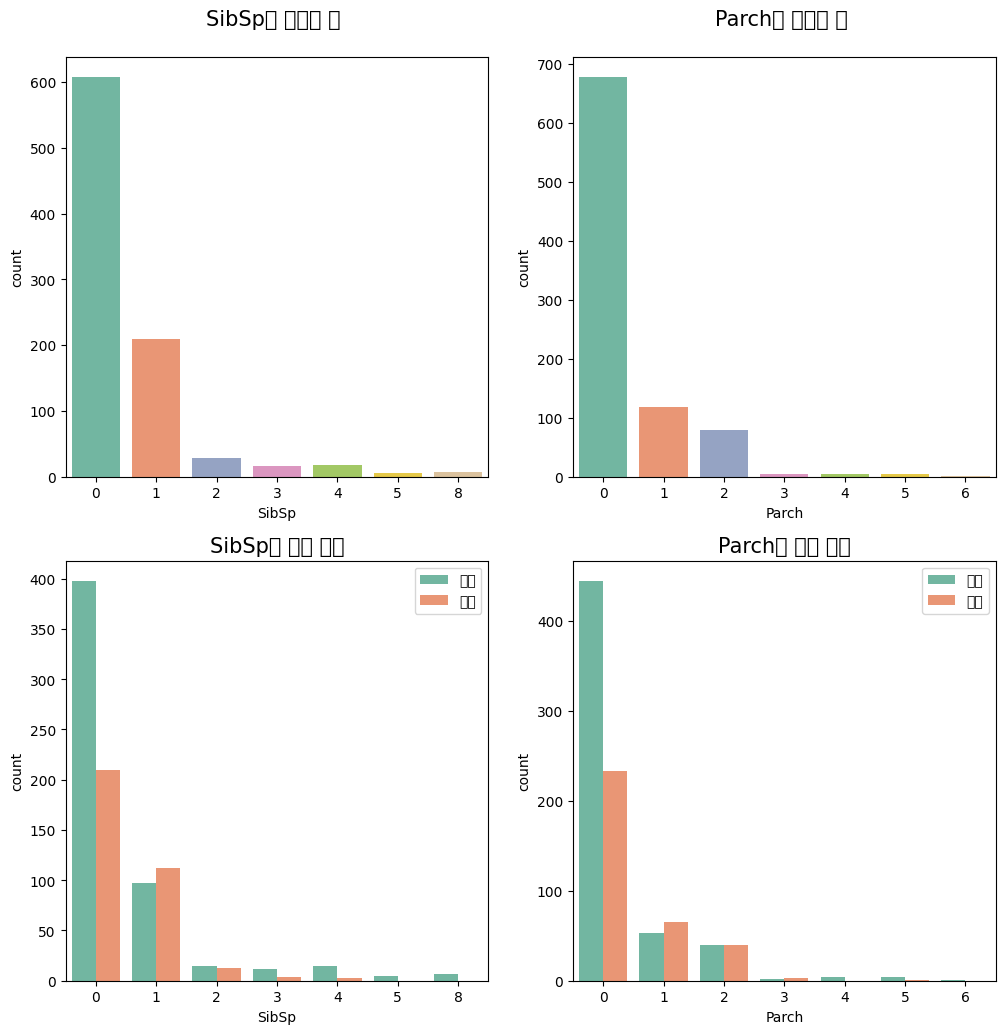

In [ ]:
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합

fig, axes = plt.subplots(2, 2, figsize = (12,12))

axes[0][0].set_title('SibSp별 탑승자 수 \n', size = 15)
sns.countplot(x='SibSp', data = train, ax = axes[0][0], palette = 'Set2')
axes[0][1].set_title('Parch별 탑승자 수 \n', size = 15)
sns.countplot(x = 'Parch', data = train, ax = axes[0][1], palette = 'Set2')

axes[1][0].set_title("SibSp별 생존 여부", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1][0], palette="Set2")
axes[1][0].legend(['사망','생존'])
axes[1][1].set_title("Parch별 생존 여부", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(['사망','생존'])

In [ ]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean()

# 생존률 : 5, 8 < 4 < 3 < 0 < 2 < 1

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [ ]:
train[['Parch', 'Survived']].groupby(['Parch']).mean()
# 생존률 : 4, 6 < 5 < 0 < 2 < 1 < 3

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


### 6.Embarked

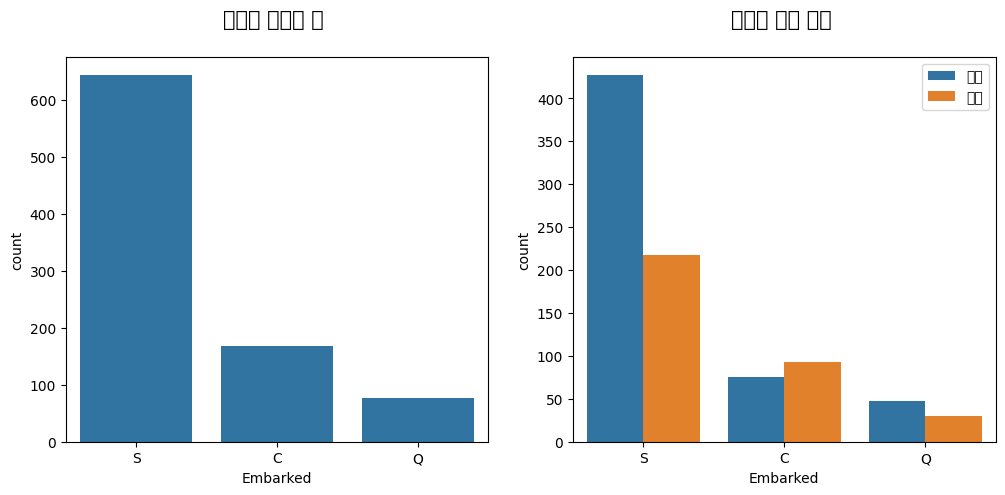

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

axes[0].set_title('항구별 탑승자 수 \n', size = 15)
sns.countplot(x='Embarked', data = train, ax = axes[0])

axes[1].set_title('항구별 생존 여부 \n', size = 15)
sns.countplot(x = 'Embarked', hue = 'Survived', data = train, ax = axes[1])
axes[1].legend(labels = ['사망', '생존'])

# S 항구 탑승자 수가 C, Q 항구 탑승자에 비해 월등히 많음
# Q 항구 탑승자 < C 항구 탑승자 < S 항구 탑승자
# 유일하게 C 항구 탑승자가 사망자보다 생존자가 더 많음


In [ ]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()
# 항구별 생존율 비교 S < Q < C

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


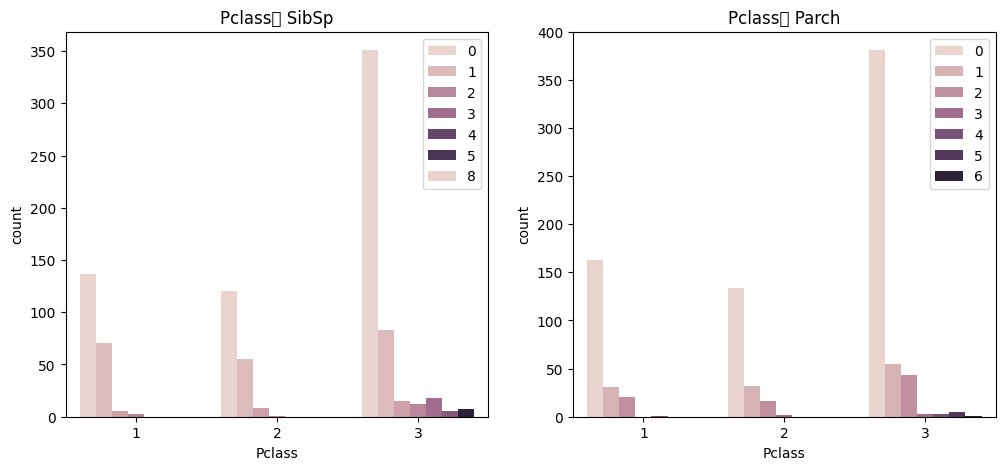

In [ ]:
# 가족과 티켓 클래스

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

axes[0].set_title('Pclass별 SibSp')
sns.countplot(x = 'Pclass', hue = 'SibSp', data = train, ax = axes[0])
axes[0].legend(['0','1','2','3','4','5','8'])

axes[1].set_title('Pclass별 Parch')
sns.countplot(x = 'Pclass', hue = 'Parch', data = train, ax = axes[1])
axes[1].legend(['0','1','2','3','4','5', '6'])

# Pclass = 3인 경우 사망자가 월등히 높았는데 이는 SibSp = 0인 경우 Pclass = 3을 이용한 사람이 많은 것과 관련이 있어 보임
# Pclass = 3인 경우 사망자가 월등히 높았는데 이는 Parch = 0인 경우 Pclass = 3을 이용한 사람이 많은 것과 관련이 있어 보임

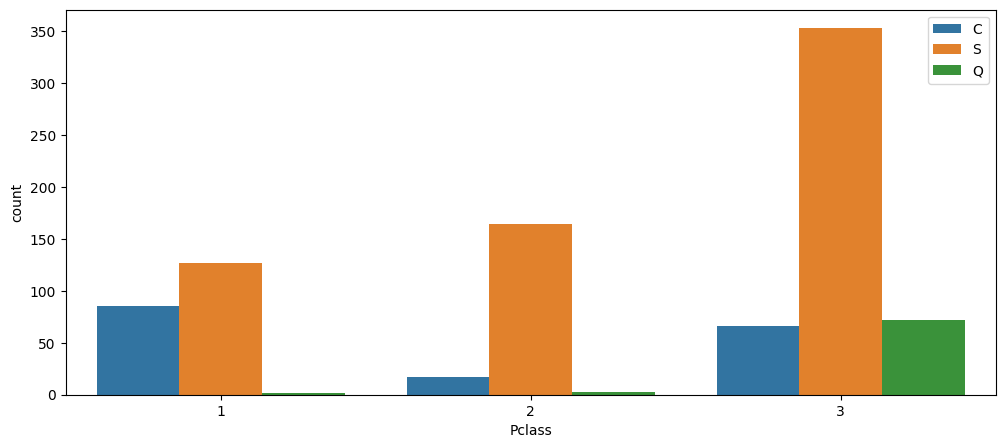

In [ ]:
# 항구 티켓 클래스

plt.figure(figsize = (12, 5))
sns.countplot(x = 'Pclass', hue = 'Embarked', data = train)
plt.legend()

# Embarked = S인 경우 생존률이 낮았는데 이는 Pclass = 3인 것과 관련 있음을 알 수 있음
# Embarked = C인 경우 생존률이 높았는데 이는 Pclass = 1인 것과 관련 있음을 알 수 있음

# ***3. Feature Engineering***  

## 상관계수는 두 변수간의 연관된 정도만 나타낼 뿐 원인 결과를 나타내는 인과관계를 설명하는 것은 아님을 반드시 알아야합니다

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


### 1. Sex data type 변경(train, test)

In [ ]:
# train과 test 데이터의 'Sex' 열 값 변환 (여성은 1, 남성은 0)
train['Sex'] = train['Sex'].replace({'female': 1, 'male': 0})
test['Sex'] = test['Sex'].replace({'female': 1, 'male': 0})


<ipython-input-44-da95505ca6ce>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'female': 1, 'male': 0})
<ipython-input-44-da95505ca6ce>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Sex'] = test['Sex'].replace({'female': 1, 'male': 0})


In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

# 종속변수를 예측하는데 필요 없을 것 같은 PassengerId, Name, Ticket 변수 제거
# Cabin의 경우 결측치가 너무 많아서 제거

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


###  2. PassengerId, Name, Ticket, Cabin 변수 제거(train, test)

In [ ]:
# train data에서 변수 제거
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [ ]:
# test data에서 변수 제거
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S
414,1,1,39.0,0,0,108.9000,C
415,3,0,38.5,0,0,7.2500,S
416,3,0,NaN,0,0,8.0500,S


### 3. Embarked 변수 결측치 처리(train)

In [ ]:
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
train['Embarked'].value_counts()

# Embarked 변수의 결측치는 S가 압도적으로 많으므로 S으로 채움

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
train['Embarked'] = train['Embarked'].fillna('S')
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


### 4. Embarked 변수 data type 변경(train)

In [ ]:
train['Embarked'] = train['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2})

# 원-핫 인코딩을 하게 되면 데이터 관련 열이 생성됨
# Sex로 예를 들면 Sex_female, Sex_male 열이 생김

<ipython-input-54-0dda961f8aa0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Embarked'] = train['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2})


### 5. Age 변수 결측치 처리(train, test)

In [ ]:
train['Age'].describe()

# 결측치를 채울 평균, 최빈값 등 다양한 값으로 채울 수 있지만 평균으로 하는 경우 성능이 좋다는 논문이 있음
# 따라서 성별 평균으로 Age 결측치 채움

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
test['Age'] = test['Age'].fillna(test['Age'].mean())
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


### 6. Fare 변수 결측치 처리(test)

In [ ]:
test['Fare'].describe()

,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


In [ ]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


##### Fare 변수의 경우 Pclass 등급이 높을수록 증가하므로 종속변수를 예측하는 데 중요한 영향을 미치지 않을 것이라 예상하여 제거하려 했음, 하지만 Fare는 가족 구성원 수에 영향을 받을 수 있다는 gpt 말에 공감하여 변수를 제거하지 않고 사용하려 함

In [ ]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [ ]:
test.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


### 6. Age 범주화

#### 사분위수로 범주화

In [ ]:
train['Age'].describe()

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


In [ ]:
# Age 변수를 사분위수 기준으로 4개 구간으로 나누기
train['Age'] = pd.qcut(train['Age'], q=4, labels=['1', '2', '3', '4'])

# 문자열 형태의 범주 데이터를 정수형(int)으로 변환
train['Age'] = train['Age'].astype(int)

# 각 구간에 포함된 데이터 개수 확인
print(train['Age'].value_counts())

# 각 구간별 생존률 확인
print(train.groupby('Age')['Survived'].mean())



Age
2    330
1    231
4    217
3    113
Name: count, dtype: int64
Age
1    0.424242
2    0.333333
3    0.451327
4    0.382488
Name: Survived, dtype: float64


In [ ]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188
std,0.841838,0.481622,12.634534,0.896760,0.981429,55.840500
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,30.272590,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Age 변수를 사분위수 기준으로 4개 구간으로 나누기
test['Age'] = pd.qcut(test['Age'], q=4, labels=['1', '2', '3', '4'])

# 문자열 형태의 범주 데이터를 정수형(int)으로 변환
test['Age'] = test['Age'].astype(int)

# 각 구간에 포함된 데이터 개수 확인
print(test['Age'].value_counts())

Age
2    172
1    114
4    105
3     27
Name: count, dtype: int64


### 7. 변수 상관계수 확인


In [ ]:
train.corr()

# 다중 공선성(Multicollinearity)은 회귀 분석 등에서 독립 변수들 간에 높은 상관관계가 있어,
# 변수의 개별적인 효과를 구별하기 어렵게 만드는 문제
# 상관계수 절댓값이 0.8 이상이면 다중 공선성을 나타낼 가능성이 높다고 판단
# 상관계수만으로 다중 공선성을 판단할 수 없을 떄는 VIF 사용
# VIF, 결정계수 학습 필요

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.004763,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.347587,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.043056,0.114631,0.245489,0.182333,0.116569
Age,-0.004763,-0.347587,-0.043056,1.000000,-0.161558,-0.060918,0.124540,-0.049607
SibSp,-0.035322,0.083081,0.114631,-0.161558,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.060918,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.124540,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,-0.049607,-0.059961,-0.078665,0.062142,1.000000


### 8. Fare, Pclass 상관계수 절대값이 0.5이상이므로 VIF 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 독립 변수만 가져오기
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# 상수항 추가 (모델에서 상수항을 고려해야 하므로)
X = add_constant(X)

# 각 변수의 VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  # 변수 이름
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # VIF 계산

# VIF 데이터 출력
print(vif_data)

# VIF 해석
# VIF 값이 1에 가까운 값은 다중 공선성이 거의 없음을 의미해.
# VIF 값이 5 이상이면 다중 공선성이 존재한다고 볼 수 있고, 10을 넘으면 심각한 다중 공선성이 있다고 판단할 수 있어.
# const : 상수항
# 다중 공선성의 문제가 없으므로 모든 변수 사용

   Variable        VIF
0     const  29.081430
1    Pclass   1.711793
2       Sex   1.119815
3       Age   1.172141
4     SibSp   1.268616
5     Parch   1.325738
6      Fare   1.620789
7  Embarked   1.051529


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 23.0+ KB


# ***4. Modeling***

## 1. KNN